In [1]:
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import time
import os
import numpy as np

from Utils import loader
from Train import train
from Model import Model

In [2]:
imdir_rs19 = '/home/physik/Dokumente/rs19/jpgs/rs19_val'
maskdir_rs19 = '/home/physik/Dokumente/rs19/uint8/rs19_val'
classes_ = {"rail-track"}
range_train = (0,0)
range_test = (2,2)
range_val = (7,8)

In [3]:
traindata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_train[0],
                      numend=range_train[1],
                      classes=classes_)

testdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_test[0],
                      numend=range_test[1],
                      classes=classes_)

valdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_val[0],
                      numend=range_val[1],
                      classes=classes_)

In [4]:
traindata[0][1].shape

torch.Size([1, 1080, 1920])

In [5]:
traindata[0][0].shape

torch.Size([3, 1080, 1920])

In [6]:
traindata[0][1].dtype

torch.float32

In [7]:
traindata[0][1]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [15]:
batchsize = 1
loss = torch.nn.BCEWithLogitsLoss()
lr = 0.001
num_epochs = 50
model_path = ""

In [16]:
model = Model.UNet(num_classes=1)

In [17]:
Trainer = train.TrainSeg(model,
                         traindata,
                         testdata,
                         valdata,
                         classes_,
                         loss,
                         batchsize,
                         lr,
                         num_epochs,
                         model_path)

In [40]:
Trainer.train()

Epoch: 1/50
Train loss: 0.101960, Test loss: 1.1026
Epoch: 2/50
Train loss: 0.100226, Test loss: 1.0827
Epoch: 3/50
Train loss: 0.101359, Test loss: 1.0935
Epoch: 4/50
Train loss: 0.099367, Test loss: 1.1448
Epoch: 5/50
Train loss: 0.101523, Test loss: 1.0963
Epoch: 6/50
Train loss: 0.100672, Test loss: 1.1367
Epoch: 7/50
Train loss: 0.098337, Test loss: 1.1300
Epoch: 8/50
Train loss: 0.098250, Test loss: 1.1030
Epoch: 9/50
Train loss: 0.098482, Test loss: 1.1541
Epoch: 10/50
Train loss: 0.098120, Test loss: 1.1196
Epoch: 11/50
Train loss: 0.096609, Test loss: 1.1311
Epoch: 12/50
Train loss: 0.095745, Test loss: 1.1468
Epoch: 13/50
Train loss: 0.095948, Test loss: 1.1171
Epoch: 14/50
Train loss: 0.096661, Test loss: 1.1767
Epoch: 15/50
Train loss: 0.099287, Test loss: 1.0904
Epoch: 16/50
Train loss: 0.098977, Test loss: 1.1498
Epoch: 17/50
Train loss: 0.098207, Test loss: 1.1024
Epoch: 18/50
Train loss: 0.095474, Test loss: 1.1156
Epoch: 19/50
Train loss: 0.094507, Test loss: 1.1368
Ep

In [41]:
Trainer.val()

Average Validation Loss: 0.8988



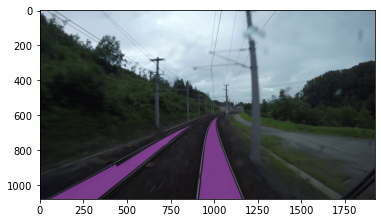

In [20]:
loader.visualize_result(traindata[0][0],traindata[0][1][0,:,:])

In [46]:
result = torch.sigmoid(model(traindata[0][0].unsqueeze(0)))

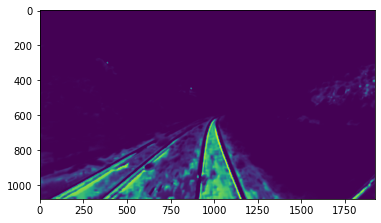

In [47]:
plt.imshow(result.detach().numpy()[0][0])

In [48]:
torch.min(result)

tensor(3.1145e-32, grad_fn=<MinBackward1>)

In [49]:
torch.max(result)

tensor(0.9314, grad_fn=<MaxBackward1>)

In [31]:
result.shape

torch.Size([1, 1, 1080, 1920])

In [24]:
zeros = torch.zeros((1,1080,1920))

In [25]:
loss(result[0],traindata[0][1])

tensor(0.1800, grad_fn=<BinaryCrossEntropyBackward0>)

In [54]:
Trainer.model_path = "/home/physik/Dokumente/Luis/Model"

In [55]:
Trainer.save()